# Linear Regressions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn.multioutput import MultiOutputRegressor
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score, cross_val_predict

sklearn.set_config(print_changed_only=False)

import import_ipynb
from Self_Written_Functions_Sheet import nan_count, nan_col_obj_list_fillna
from Self_Written_Functions_Sheet import mvarea_1_to_0, mvarea_0_to_mean, mvtype_none_to_mode
from Self_Written_Functions_Sheet import rmse

%store -r

importing Jupyter notebook from Self_Written_Functions_Sheet.ipynb


In [2]:
hp_full_strd

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_

In [3]:
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


## Attempting Multilinear Regression

## Using hp_full_strd dataset

In [4]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train and test sets
xtrain_full, xtest_full, ytrain_full, ytest_full = ms.train_test_split(hp_full_strd,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)
# Must flatten to fit
ytrain_full = ytrain_full.values.flatten()

lm = LinearRegression()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# parameters to use
normilize = [True, False]
fitintercept = [True, False]
gparam_mlr_1 = {'fit_intercept': fitintercept, 'normalize': normilize}

# setting parameters
gs_mlr_1 = ms.GridSearchCV(lm, gparam_mlr_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_1.fit(xtrain_full, ytrain_full)

# setting up dataframe for results
train_scores.append(gs_mlr_1.best_estimator_.score(xtrain_full, ytrain_full))
test_scores.append(gs_mlr_1.best_estimator_.score(xtest_full, ytest_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_1, ytrain_full, xtrain_full)) 
test_rmse.append(rmse(gs_mlr_1, ytest_full, xtest_full))

# add the best parameters to the df
best_par_list.append(gs_mlr_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df_full = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_full

Wall time: 2.24 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.948726,0.921493,0.08975,0.115347,-0.025597,False,True


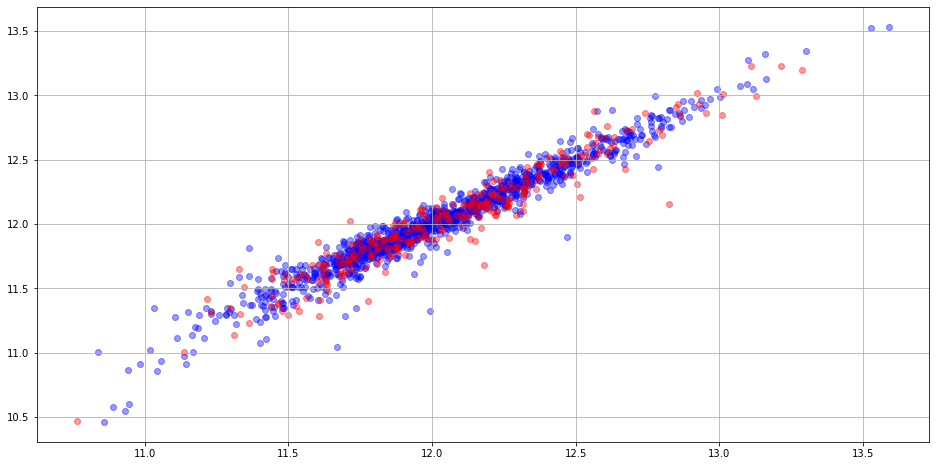

In [5]:
plt.figure(figsize=(16, 8))
plt.scatter(gs_mlr_1.best_estimator_.predict(xtrain_full), ytrain_full, color='blue', alpha=0.4)
plt.scatter(gs_mlr_1.best_estimator_.predict(xtest_full), ytest_full, color='red', alpha=0.4)
plt.grid(which='both')

## Trying with Lasso

In [6]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train_full and test_full sets
xtrain_full, xtest_full, ytrain_full, ytest_full = ms.train_test_split(hp_full_strd,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

# Must flatten to fit
ytrain_full = ytrain_full.values.flatten()

lasso = Lasso(random_state=state, max_iter=1000000, selection='random',
              normalize=True, fit_intercept=True)

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# parameters to use
alphas = np.linspace(1e-4, 2.5e-4, 30)
gparam_lasso_1 = {'alpha': alphas}

# setting parameters
gs_lasso_1 = ms.GridSearchCV(lasso, gparam_lasso_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso_1.fit(xtrain_full, ytrain_full)

# setting up dataframe for results
train_scores.append(gs_lasso_1.best_estimator_.score(xtrain_full, ytrain_full))
test_scores.append(gs_lasso_1.best_estimator_.score(xtest_full, ytest_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_lasso_1, ytrain_full, xtrain_full))
test_rmse.append(rmse(gs_lasso_1, ytest_full, xtest_full))

# add the best parameters to the df
best_par_list.append(gs_lasso_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lasso_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lasso_res_df_full = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df_full

Wall time: 1.53 s


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha
0,0.927988,0.939744,0.106362,0.101054,0.005308,0.000141


### we see underfitting above

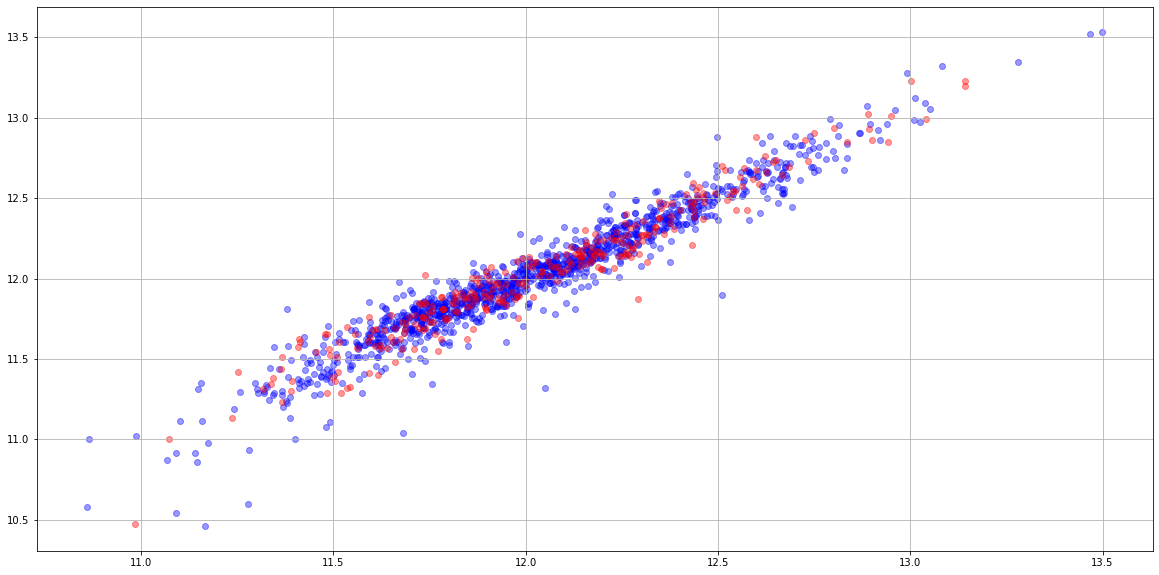

In [7]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso_1.best_estimator_.predict(xtrain_full), ytrain_full, color='blue', alpha=0.4)
plt.scatter(gs_lasso_1.best_estimator_.predict(xtest_full), ytest_full, color='red', alpha=0.4)
plt.grid(which='both')

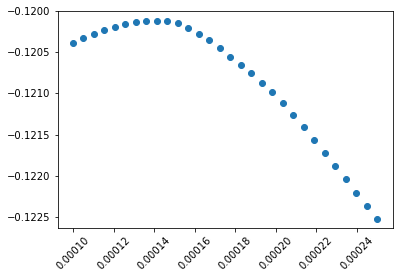

In [8]:
plt.xticks(rotation=45)
plt.scatter(gs_lasso_1.cv_results_['param_alpha'], gs_lasso_1.cv_results_['mean_test_score'])

## Using reduced DF hp_full_strd

In [9]:
lasso_coef_strd = pd.Series(gs_lasso_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(lasso_coef_strd.abs().sort_values(ascending=False).to_string())

YearBuilt                111.171120
GrLivArea                 15.077843
OverallQual               14.044297
OverallCond                7.448016
TotalBsmtSF                3.861360
GarageCars                 2.678237
KitchenAbvGr               1.826942
GarageArea                 1.497279
YrsRemodToSold             1.105216
Fireplaces                 0.933539
LotArea                    0.923200
1stFlrSF                   0.861328
BsmtFinTotalSF             0.832931
LotFrontage                0.791887
BsmtFinSF1                 0.767924
TotalBaths                 0.738123
BsmtFullBath               0.438568
TotalPorchSF               0.354658
WoodDeckSF                 0.324026
HalfBath                   0.271632
Functional_Sev             0.225308
TotRmsAbvGrd               0.215783
ScreenPorch                0.174770
Functional_Maj2            0.130701
Exterior1st_BrkComm        0.110840
MasVnrArea                 0.105623
Street_Pave                0.100774
Neighborhood_Crawfor       0

In [10]:
lasso_coef_index_01 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) > 0]

hp_lasso_strd_reduced = hp_full_strd.iloc[:,lasso_coef_index_01]

%store hp_lasso_strd_reduced
hp_lasso_strd_reduced

Stored 'hp_lasso_strd_reduced' (DataFrame)


,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,TotalBaths,BsmtFinTotalSF,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RL,Street_Pave,LotShape_IR2,LotShape_Reg,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,Condition1_RRAe,BldgType_Twnhs,RoofStyle_Gable,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior2nd_Stucco,MasVnrType_Stone,ExterQual_Fa,ExterQual_TA,ExterCond_Fa,ExterCond_TA,Foundation_PConc,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType2_BLQ,Heating_Grav,HeatingQC_TA,CentralAir_Y,KitchenQual_TA,Functional_Maj2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Basment,GarageType_CarPort,GarageFinish_Unf,GarageQual_Gd,GarageCond_Fa,PavedDrive_Y,SaleType_ConLI,SaleType_New,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30.0,MSSubClass_160.0,LotFrontage
0,0.015398,0.029344,0.023029,0.026608,0.024858,0.029998,0.019815,0.018420,0.028104,0.039163,0.041487,0.024485,0.031232,0.000000,0.027315,0.027731,0.000000,0.0,0.035089,0.027808,0.0,0.011747,0.031623,0.000000,0.004240,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.023184
1,0.017494,0.025152,0.036846,0.026250,0.000000,0.041555,0.029214,0.027156,0.020741,0.000000,0.000000,0.024485,0.023424,0.029553,0.027315,0.023278,0.049806,0.0,0.028071,0.038521,0.0,0.000000,0.000000,0.037878,0.026288,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.028534
2,0.020500,0.029344,0.023029,0.026582,0.020546,0.020650,0.021297,0.019797,0.029353,0.039163,0.041487,0.024485,0.023424,0.029553,0.027315,0.030767,0.000000,0.0,0.035089,0.019143,0.0,0.008088,0.031623,0.000000,0.005088,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.024254
3,0.017403,0.029344,0.023029,0.025439,0.000000,0.009178,0.017501,0.020679,0.028219,0.039163,0.000000,0.024485,0.027328,0.029553,0.040973,0.032487,0.000000,0.0,0.014036,0.008508,0.0,0.059119,0.031623,0.000000,0.030529,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021400
4,0.025985,0.033536,0.023029,0.026568,0.044389,0.027831,0.026505,0.024638,0.036124,0.039163,0.041487,0.024485,0.035136,0.029553,0.040973,0.042304,0.032090,0.0,0.035089,0.025799,0.0,0.016176,0.031623,0.037878,0.006784,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.029961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.014427,0.025152,0.023029,0.026555,0.000000,0.000000,0.0220

## features that were kept with lasso

In [11]:
list(hp_lasso_strd_reduced.columns)

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'ScreenPorch',
 'TotalBaths',
 'BsmtFinTotalSF',
 'LowQualFin',
 'TotalPorchSF',
 'Porches',
 'Decks',
 'YrsRemodToSold',
 'MSZoning_FV',
 'MSZoning_RL',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NWAmes',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_RRAe',
 'BldgType_Twnhs',
 'RoofStyle_Gable',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_Stucco',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_Stucco',
 'MasVnrType_Stone',
 'E

### Columns that I created that made it through:
- BsmtFinTotalSF
- LowQualFin
- TotalPorchSF
- Porches
- Decks
- YrsRemodToSold

### Columns that I created that did NOT make it through:
- TotalBaths
- BsmtBaths
- BsmtUnfin
- 2ndFlr

In [12]:
# columns that were dropped by lasso

lasso_coef_index_00 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) == 0]
hp_lasso_strd_dropped = hp_full_strd.iloc[:, lasso_coef_index_00]
list(hp_lasso_strd_dropped.columns)

['YearRemodAdd',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'FullBath',
 'BedroomAbvGr',
 'GarageYrBlt',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'BsmtBaths',
 'BsmtUnfin',
 '2ndFlr',
 'MSZoning_RH',
 'MSZoning_RM',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Co

## using the lasso reduced dataset in multilinear regression

In [13]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train_lso and test_lso sets
xtrain_lso, xtest_lso, ytrain_lso, ytest_lso = ms.train_test_split(hp_lasso_strd_reduced,
                                                                   hp_logsaleprice,
                                                                   test_size=0.2,
                                                                   random_state=0)

# Must flatten to fit
ytrain_lso = ytrain_lso.values.flatten()

lm = LinearRegression()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# parameters to use
fitintercept = [True, False]
gparam_mlr_lso = {'fit_intercept': fitintercept}

# setting parameters
gs_mlr_lso = ms.GridSearchCV(lm, gparam_mlr_lso, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_lso.fit(xtrain_lso, ytrain_lso)

# setting up dataframe for results
train_scores.append(gs_mlr_lso.best_estimator_.score(xtrain_lso, ytrain_lso))
test_scores.append(gs_mlr_lso.best_estimator_.score(xtest_lso, ytest_lso))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_lso, ytrain_lso, xtrain_lso))
test_rmse.append(rmse(gs_mlr_lso, ytest_lso, xtest_lso))

# add the best parameters to the df
best_par_list.append(gs_mlr_lso.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'train_rmse', 'test_rmse', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df_sel2 = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_sel2

Wall time: 27 ms


,TrainScores,TestScores,train_rmse,test_rmse,DiffRMSE,fit_intercept
0,0.934458,0.934511,0.101472,0.10535,-0.003879,True


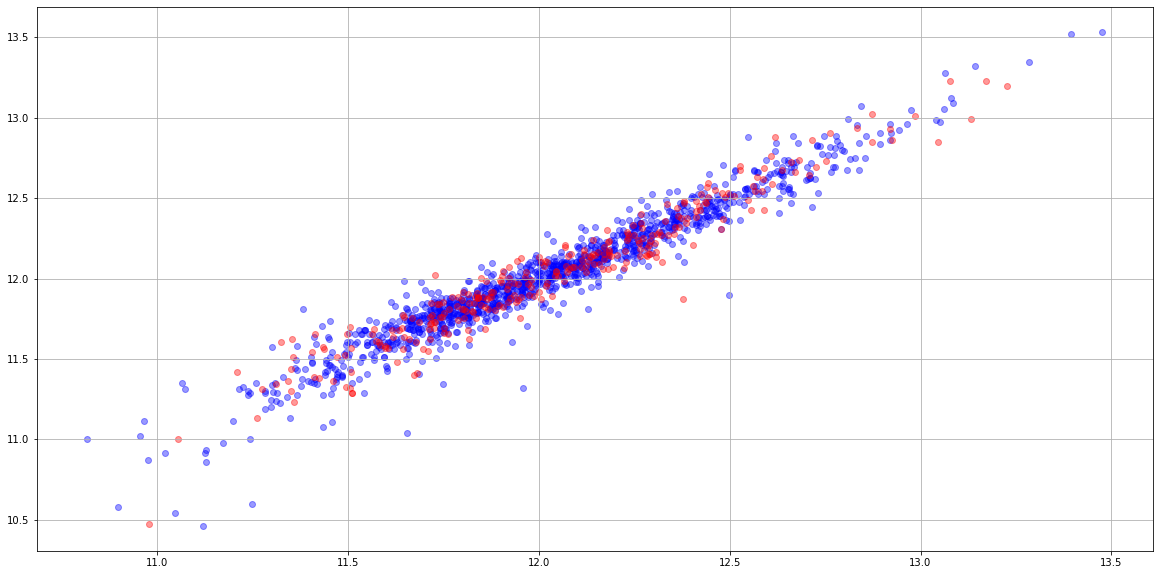

In [14]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr_lso.best_estimator_.predict(xtrain_lso), ytrain_lso, color='blue', alpha=0.4)
plt.scatter(gs_mlr_lso.best_estimator_.predict(xtest_lso), ytest_lso, color='red', alpha=0.4)
plt.grid(which='both')

In [15]:
# Storing parameters 
mlr_lasso_std_red = LinearRegression(n_jobs=-1, fit_intercept=True)

%store mlr_lasso_std_red

Stored 'mlr_lasso_std_red' (LinearRegression)
